<h2>Task2: Data Exploration On Dataset</h2>
<h3>Description</h3>
<p>1. join all the data together<br/>
2. plot the distribution of numeric columns<br/>
3. create box-plot on numeric columns<br/>
4. data profiling on all columns (hint: use the relevant package from boston_crime notebook)</p>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

<h3>1. Join all the data together</h3>

In [2]:
"""read in files"""
# ref. https://honingds.com/blog/read-multiple-data-files-into-pandas/
from glob import glob
filenames = glob('data/*.csv')
dfs = [pd.read_csv(f) for f in filenames]
print([df.shape for df in dfs])  # to manually check the order of the imported dataframes

# dfs[0] order_products
# dfs[1] products
# dfs[2] orders
# dfs[3] departments
# dfs[4] aisles


[(33819106, 3), (49688, 4), (3421083, 6), (21, 2), (134, 2)]


In [3]:
"""merge dataframes"""
# ref. https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df = pd.merge(dfs[1], dfs[3], on='department_id', how='left')
df = pd.merge(df, dfs[4], on='aisle_id', how='left')
df = pd.merge(df, dfs[0], on='product_id', how='right')
df = pd.merge(df, dfs[2], on='order_id', how='left')

# Order the columns to increase readability
# ref.https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
cols = ['order_id','user_id','order_number','add_to_cart_order',
 'product_id','product_name','department_id','department','aisle_id','aisle',
 'order_dow','order_hour_of_day','days_since_prior_order']
df = df[cols]
df

order_id  user_id  order_number  add_to_cart_order  product_id  \
0                2   202279             3                  1       33120   
1               26   153404             2                  5       33120   
2              120    23750            11                 13       33120   
3              327    58707            21                  5       33120   
4              390   166654            48                 28       33120   
...            ...      ...           ...                ...         ...   
33819101   2269288    15012            27                 31       27499   
33819102   2507248    46748            30                  9       27499   
33819103   2271346   169335             5                 15       37703   
33819104   3004244   169709             8                 25       43725   
33819105   3376312   145958            34                  6       36233   

                                               product_name  department_id  \
0                                        Organic Egg Whites             16   
1                                        Organic Egg Whites             16   
2                                        Organic Egg Whites             16   
3                                        Organic Egg Whites             16   
4                                        Organic Egg Whites             16   
...                                                     ...            ...   
33819101                  Non-Dairy Coconut Seven Layer Bar             21   
33819102                  Non-Dairy Coconut Seven Layer Bar             21   
33819103  Ultra Sun Blossom Liquid 90 loads Fabric Enhan...             17   
33819104                               Sweetart Jelly Beans             21   
33819105                            Water With Electrolytes             21   

          department  aisle_id    aisle  order_dow  order_hour_of_day  \
0         dairy eggs        86     eggs          5                  9   
1         dairy eggs        86     eggs          0                 16   
2         dairy eggs        86     eggs          6                  8   
3         dairy eggs        86     eggs          6                  9   
4         dairy eggs        86     eggs          0                 12   
...              ...       ...      ...        ...                ...   
33819101     missing       100  missing          3                 14   
33819102     missing       100  missing          5                 23   
33819103   household        75  laundry          4                 13   
33819104     missing       100  missing          0                 18   
33819105     missing       100  missing          4                  7   

          days_since_prior_order  
0                            8.0  
1                            7.0  
2                           10.0  
3                            8.0  
4                            9.0  
...                          ...  
33819101                     6.0  
33819102                     7.0  
33819103                    30.0  
33819104                    14.0  
33819105                     6.0  

[33819106 rows x 13 columns]

<h3>2. Plot the distribution of numeric columns</h3>

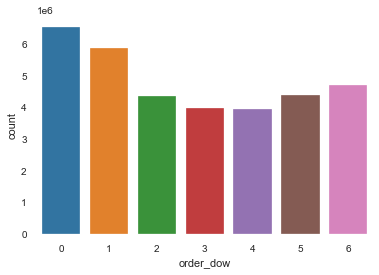

In [4]:
"""Seaborn Countplot ref. https://seaborn.pydata.org/generated/seaborn.countplot.html"""
"""1. Distribution of order_dow (discrete data, bar chart)"""
ax1 = sns.countplot(x="order_dow", data = df)
ax1

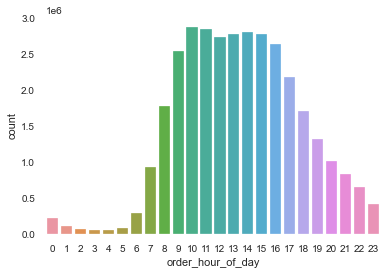

In [5]:
"""2. Distribution of order_hour_of_day (discrete data, bar chart)"""
ax2 = sns.countplot(x="order_hour_of_day", data = df)
ax2

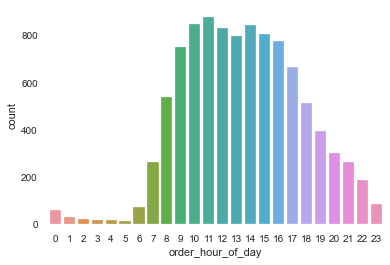

In [6]:
# sampling
sample3 = df.sample(n=10000)
ax3 = sns.countplot(x="order_hour_of_day", data = sample3)
ax3

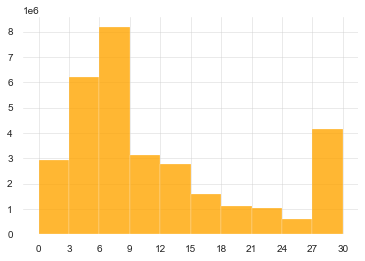

In [7]:
"""3. Distribution of days_since_prior_order (continous data, histogram)"""
data = df['days_since_prior_order'].dropna().astype('int')
d = 3

plt.hist(data, range(min(data), max(data)+d, d), color='orange', alpha=0.8)
plt.xticks(range(min(data),max(data)+d, d))
plt.grid(alpha=0.4)
plt.show()

<h3>3. create box-plot on numeric columns</h3>

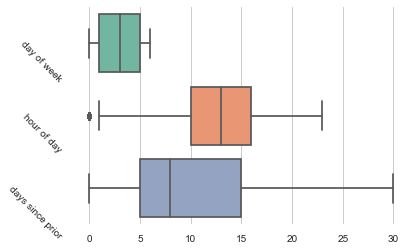

In [8]:
"""Seaborn Boxplot ref.https://seaborn.pydata.org/generated/seaborn.boxplot.html"""

ax4 = sns.boxplot(data=df[['order_dow', 'order_hour_of_day', 'days_since_prior_order']], orient="h", palette="Set2")
ax4.yaxis.grid(False) # Hide the horizontal gridlines
ax4.xaxis.grid(True) # Show the vertical gridlines 
# ref.https://stackoverflow.com/questions/53891136/how-to-add-vertical-grid-lines-in-a-grouped-boxplot-in-seaborn
ax4.set_yticklabels(labels=['day of week', 'hour of day', 'days since prior'], rotation=-45)
# ref.https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
ax4

<h3>4. Data profiling on all columns</h3>


In [9]:
"""pandas-profiling"""
# tutorial: tutorial: https://www.youtube.com/watch?v=Ef169VELt5o"
# documentation: https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html#documentation

# Kernel died after 6 minutes processing -> sampled 100000
profile = pandas_profiling.ProfileReport(df.sample(n=100000))
profile